In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the filtered DataFrame from the CSV file
filtered_df = pd.read_csv('data/filtered_data.csv')

# Display the first few rows of the DataFrame to verify it loaded correctly
print(filtered_df.head())

         date           Company Name   Symbol                    author  year  \
0  2024-07-29  havells india limited  HAVELLS        Geojit BNP Paribas  2024   
1  2024-07-21  havells india limited  HAVELLS               Anand Rathi  2024   
2  2024-07-19  havells india limited  HAVELLS      Keynote Capitals Ltd  2024   
3  2024-07-19  havells india limited  HAVELLS       Prabhudas Lilladhar  2024   
4  2024-06-05  havells india limited  HAVELLS  BOB Capital Markets Ltd.  2024   

           Sector  expected_return  actual_return  
0  Consumer Goods       -10.535481      -0.011863  
1  Consumer Goods        21.345773       0.036465  
2  Consumer Goods        -2.742437       0.039960  
3  Consumer Goods        11.733107       0.039960  
4  Consumer Goods        -0.713967       0.011188  


In [2]:
# Calculate correlation
correlation = filtered_df[['expected_return', 'actual_return']].corr().iloc[0, 1]
print(f"Correlation between expected returns and actual returns: {correlation}")

Correlation between expected returns and actual returns: -0.029279284079480924


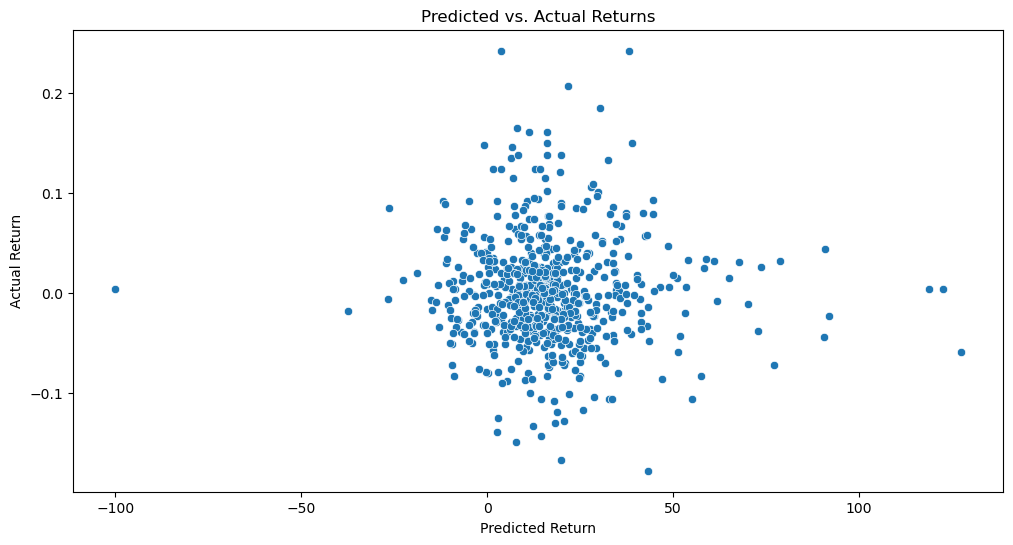

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='expected_return', y='actual_return')
plt.title('Predicted vs. Actual Returns')
plt.xlabel('Predicted Return')
plt.ylabel('Actual Return')
plt.show()


In [ ]:
# Groupby companies/sectors
# Group by unique combinations of the specified columns and count the occurrences of each unique combination
grouped_analyst_ratings = analyst_ratings.groupby(
    ['stock_name', 'matched_company_name', 'Company Name', 'Symbol']
).size().reset_index(name='count')

grouped_analyst_ratings

In [17]:
# Groupby Timelines
import pandas as pd

# Step 1: Extract the year from the 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate the correlation between actual and expected return grouped by year
# Ensure you have an 'actual_return' column calculated in your DataFrame
correlation_by_year = filtered_df.groupby('year').apply(
    lambda group: group[['expected_return', 'actual_return']].corr().iloc[0, 1]
)

# Print the correlation results for each year
print("Correlation between expected and actual returns by year:")
print(correlation_by_year)

Correlation between expected and actual returns by year:
year
2014         NaN
2015    0.034897
2016   -0.044052
2017    0.285551
2018   -0.204528
2019   -0.088272
2020    0.070569
2021    0.027652
2022   -0.074631
2023    0.221254
2024   -0.208925
dtype: float64


C:\Users\disch\AppData\Local\Temp\ipykernel_11620\3742466470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year = filtered_df.groupby('year').apply(


In [18]:
# Step 1: Extract the year from the 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate the correlation between actual and expected returns grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by 'year' and 'Symbol' (ticker) and calculate correlation
correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns for each ticker in each year
mapped_returns = filtered_df.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge the correlation and return mappings
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Print the results
print("Correlation, expected and actual returns by year and ticker:")
print(merged_results)


Correlation, expected and actual returns by year and ticker:
     year     Symbol  correlation  expected_return  actual_return
0    2014    HAVELLS          NaN         7.591378       0.078384
1    2015    ACLGATI          NaN        58.144176       0.025457
2    2015  AURIONPRO          NaN        72.884440      -0.037464
3    2015    DHANUKA     1.000000        10.037672      -0.102774
4    2015    HAVELLS     0.406506         6.050510       0.032681
..    ...        ...          ...              ...            ...
100  2024       PGEL          NaN        28.489007       0.108765
101  2024    POLYMED          NaN        -4.107558      -0.028398
102  2024   RELIGARE          NaN       127.301859      -0.058444
103  2024    ROSSARI     0.086800        20.428919       0.009161
104  2024       RVNL     1.000000        -1.662380       0.127137

[105 rows x 5 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2612998841.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


C:\Users\disch\AppData\Local\Temp\ipykernel_3948\270513493.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


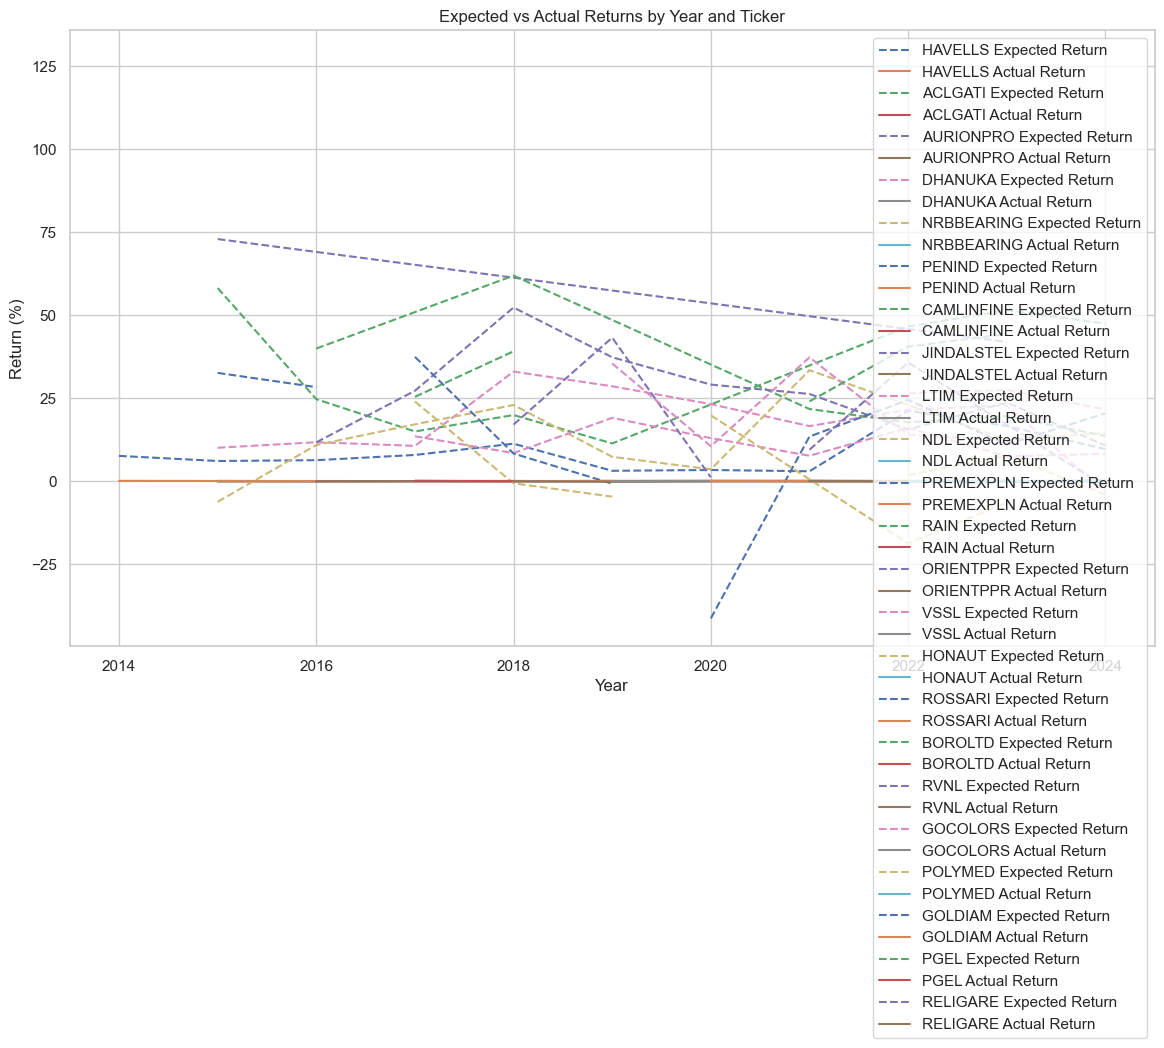

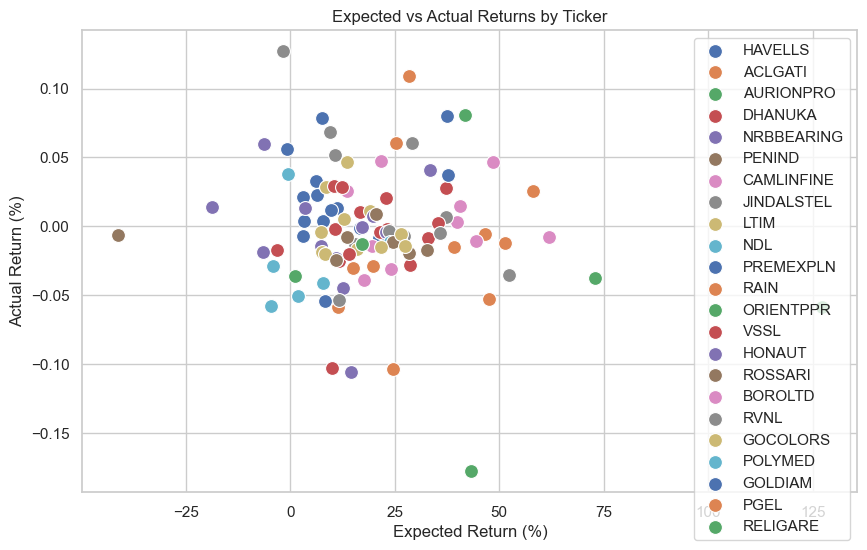

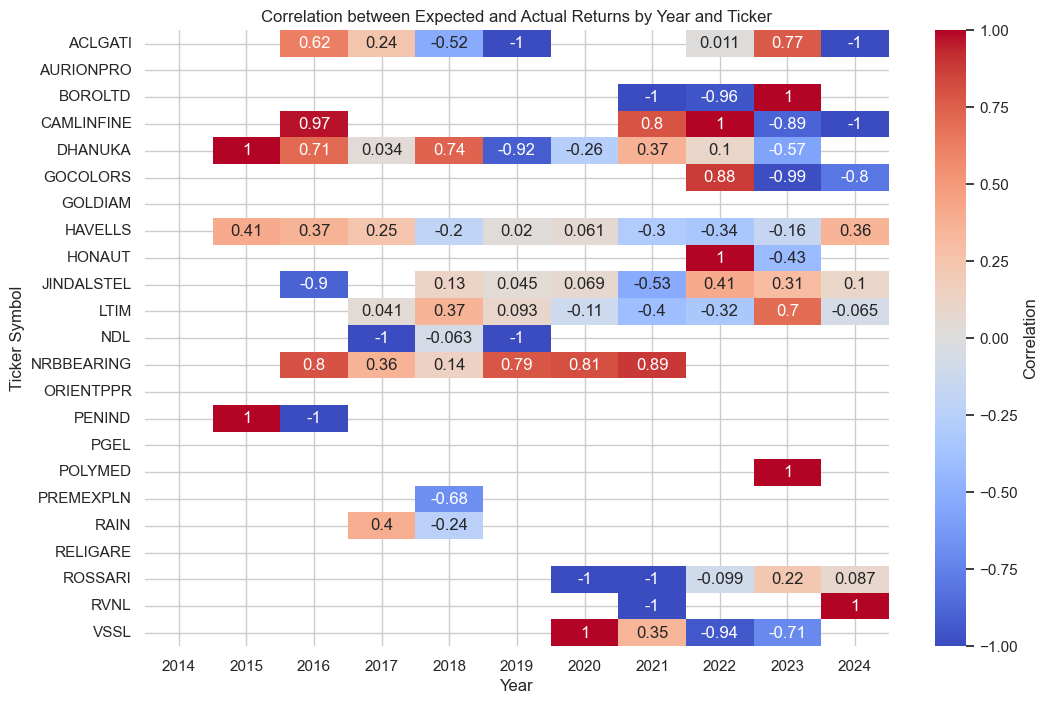

In [6]:
# Step 1: Extract year from 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate correlation grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns
mapped_returns = filtered_df.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge correlation results with mapped returns
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Step 4: Plotting
# Set up the plot environment
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot 1: Line plot of expected and actual returns for each year and ticker
for ticker in merged_results['Symbol'].unique():
    ticker_data = merged_results[merged_results['Symbol'] == ticker]
    
    plt.plot(ticker_data['year'], ticker_data['expected_return'], label=f'{ticker} Expected Return', linestyle='--')
    plt.plot(ticker_data['year'], ticker_data['actual_return'], label=f'{ticker} Actual Return', linestyle='-')

# Plot title and labels
plt.title("Expected vs Actual Returns by Year and Ticker")
plt.xlabel("Year")
plt.ylabel("Return (%)")
plt.legend(loc="upper right")
plt.grid(True)
# Save the plot to the device
plt.savefig('data/expected_vs_actual_returns_line_plot.png')
plt.show()

# Plot 2: Scatter plot of expected vs actual returns with correlation
plt.figure(figsize=(10, 6))
for ticker in merged_results['Symbol'].unique():
    ticker_data = merged_results[merged_results['Symbol'] == ticker]
    sns.scatterplot(data=ticker_data, x='expected_return', y='actual_return', label=ticker, s=100)

# Scatter plot title and labels
plt.title("Expected vs Actual Returns by Ticker")
plt.xlabel("Expected Return (%)")
plt.ylabel("Actual Return (%)")
plt.legend(loc="best")
plt.grid(True)
# Save the scatter plot
plt.savefig('data/expected_vs_actual_returns_scatter_plot.png')
plt.show()


# Plot 3: Heatmap of correlations by year and ticker
pivot_table = merged_results.pivot(index="Symbol", columns="year", values="correlation")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation between Expected and Actual Returns by Year and Ticker")
plt.xlabel("Year")
plt.ylabel("Ticker Symbol")
# Save the heatmap plot
plt.savefig('data/correlation_heatmap.png')
plt.show()

In [19]:
# Step 1: Calculate correlation grouped by sector
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by sector and calculate the correlation for each sector
correlation_by_sector = filtered_df.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')

# Display the correlation by sector
print("Correlation between expected and actual returns by sector:")
print(correlation_by_sector)

Correlation between expected and actual returns by sector:
               Sector  correlation
0      Consumer Goods    -0.075283
1              Energy     0.141444
2             Finance    -0.121837
3          Healthcare     0.343641
4       Manufacturing     0.015537
5          Technology     0.065681
6  Telecommunications    -0.054823


C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2895770494.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_sector = filtered_df.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')


In [20]:
import pandas as pd

# Filter out rows with NaN values in 'expected_return' and 'actual_return'
filtered_author_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Calculate correlations by author, excluding groups with insufficient data
author_correlations = (
    filtered_author_df.groupby('author', as_index=False)  # Keep author as a column
    .filter(lambda x: len(x) > 1)  # Ensure at least two data points
)

# Now calculate the correlation
author_correlations = (
    author_correlations.groupby('author', group_keys=False)
    .apply(lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])}))
    .reset_index()
)

# Display the results
print(author_correlations)

                              author  correlation
0                        AUM Capital     0.834745
1                        Anand Rathi     0.975618
2                      Angel Broking    -1.000000
3                        Axis Direct     0.191618
4           BOB Capital Markets Ltd.    -0.066707
5                            Bonanza     1.000000
6                Chola Wealth Direct     0.271378
7                      Dolat Capital    -0.343397
8                          Edelweiss    -0.167934
9                              Emkay     0.036317
10                Geojit BNP Paribas    -0.099693
11                   HDFC Securities     0.143396
12                      ICICI Direct    -0.123333
13          ICICI Securities Limited     0.089705
14                      IDBI Capital    -0.122017
15                      JM Financial    -1.000000
16                         KRChoksey     0.321818
17                             Karvy     0.016246
18              Keynote Capitals Ltd    -0.544101


C:\Users\disch\AppData\Local\Temp\ipykernel_11620\1515320299.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])}))


In [21]:
import pandas as pd

# Using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'expected_return'] = pd.to_numeric(filtered_df['expected_return'], errors='coerce')
filtered_df.loc[:, 'actual_return'] = pd.to_numeric(filtered_df['actual_return'], errors='coerce')

# Drop rows where either 'expected_return' or 'actual_return' is NaN
filtered_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Function to calculate correlation with minimum group size check
def calculate_correlation(df, group_cols):
    # Filter groups with at least two data points to avoid degrees of freedom error
    df_grouped = df.groupby(group_cols).filter(lambda x: len(x) > 1)
    return df_grouped.groupby(group_cols, as_index=False).apply(
        lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])})
    ).reset_index(drop=True)

# (1) Correlation by (year, author)
year_author_corr = calculate_correlation(filtered_df, ['year', 'author'])

# Display the results
print("Correlation by (year, author):\n", year_author_corr)

C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2909189485.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


Correlation by (year, author):
     year                    author  correlation
0   2015  BOB Capital Markets Ltd.     0.842666
1   2015       Chola Wealth Direct     0.086817
2   2015           Phillip Capital     0.254804
3   2016       Chola Wealth Direct     0.757072
4   2016           HDFC Securities     0.538052
..   ...                       ...          ...
93  2024                 KRChoksey    -0.385458
94  2024      Keynote Capitals Ltd     0.288138
95  2024             Motilal Oswal    -0.028693
96  2024       Prabhudas Lilladhar     0.496572
97  2024                 Sharekhan     1.000000

[98 rows x 3 columns]


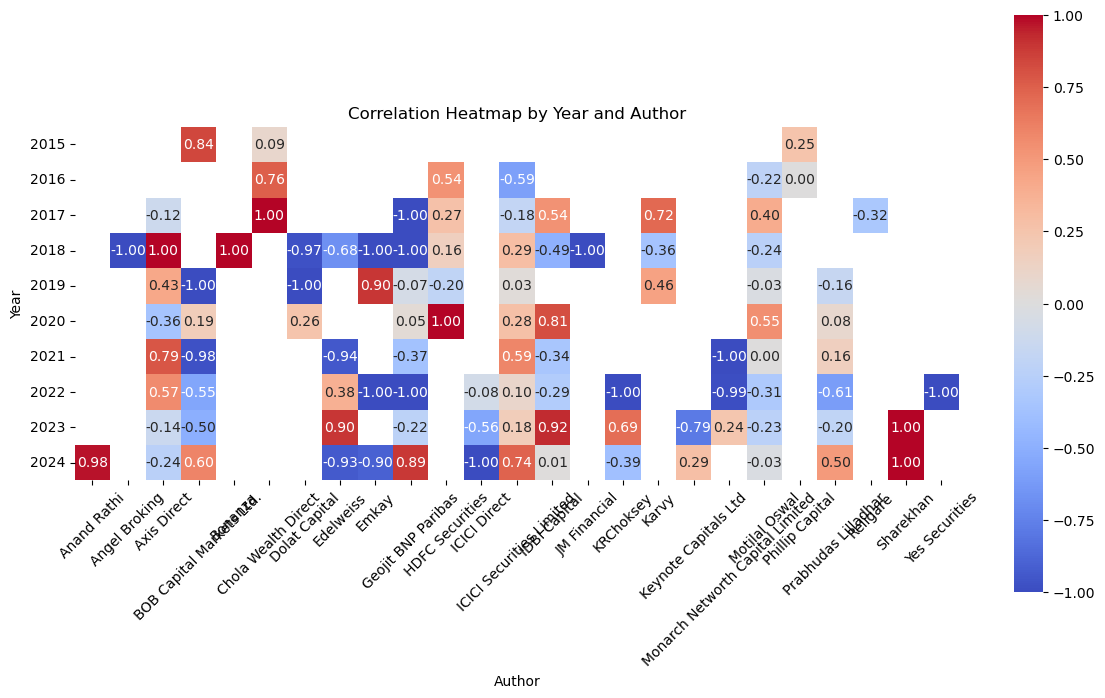

In [22]:

# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data = year_author_corr.pivot(index='year', columns='author', values='correlation')

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Year and Author')
plt.xlabel('Author')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# (2) Correlation by (year, sector)
year_sector_corr = calculate_correlation(filtered_df, ['year', 'Sector'])
print("\nCorrelation by (year, sector):\n", year_sector_corr)


Correlation by (year, sector):
     year              Sector  correlation
0   2015      Consumer Goods     0.406506
1   2015          Technology     0.916257
2   2016      Consumer Goods     0.366037
3   2016          Healthcare     0.621926
4   2016       Manufacturing    -0.547948
5   2016          Technology     0.575729
6   2017      Consumer Goods     0.250595
7   2017             Finance     0.040604
8   2017          Healthcare     0.244423
9   2017       Manufacturing     0.378522
10  2017          Technology     0.033824
11  2017  Telecommunications    -1.000000
12  2018      Consumer Goods    -0.199377
13  2018              Energy    -0.682790
14  2018             Finance     0.365534
15  2018          Healthcare    -0.524752
16  2018       Manufacturing    -0.128119
17  2018          Technology     0.652988
18  2018  Telecommunications    -0.063471
19  2019      Consumer Goods     0.019893
20  2019             Finance     0.093031
21  2019          Healthcare    -1.000000
2

C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2909189485.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


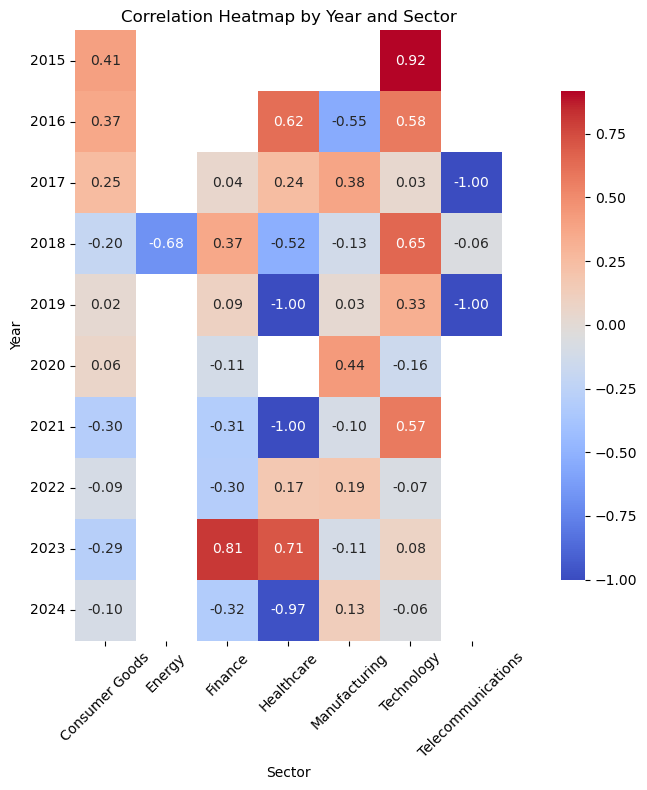

In [24]:
# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data_sector = year_sector_corr.pivot(index='year', columns='Sector', values='correlation')

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_sector, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Year and Sector')
plt.xlabel('Sector')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
# (3) Correlation by (sector, author)
sector_author_corr = calculate_correlation(filtered_df, ['Sector', 'author'])
print("\nCorrelation by (sector, author):\n", sector_author_corr)


Correlation by (sector, author):
                 Sector                            author  correlation
0       Consumer Goods                       Anand Rathi     0.999894
1       Consumer Goods                       Axis Direct    -1.000000
2       Consumer Goods          BOB Capital Markets Ltd.    -0.251559
3       Consumer Goods               Chola Wealth Direct     0.271378
4       Consumer Goods                     Dolat Capital    -0.119958
5       Consumer Goods                         Edelweiss    -0.712385
6       Consumer Goods                             Emkay    -0.896341
7       Consumer Goods                Geojit BNP Paribas    -0.311422
8       Consumer Goods                   HDFC Securities     0.184101
9       Consumer Goods                      ICICI Direct     0.290493
10      Consumer Goods          ICICI Securities Limited    -0.035375
11      Consumer Goods                      JM Financial    -1.000000
12      Consumer Goods                             Karv

C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2909189485.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


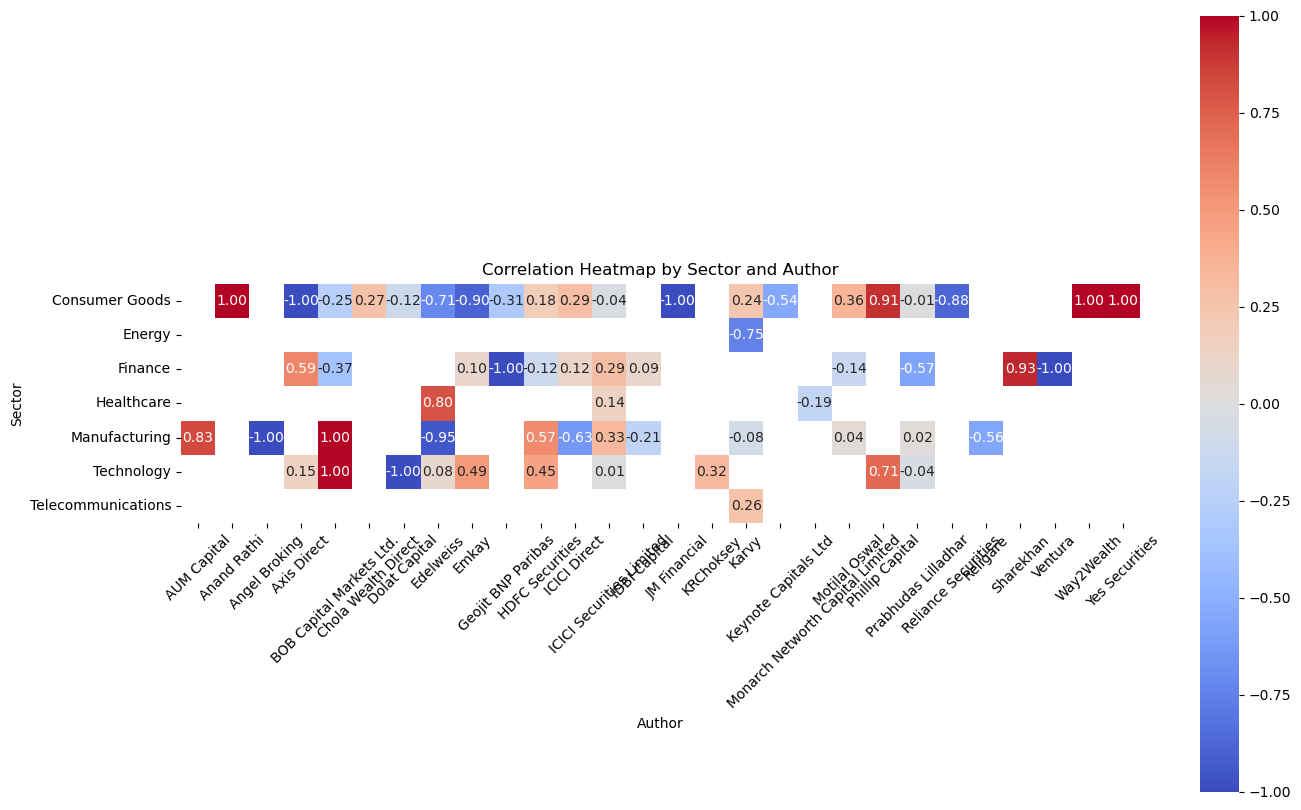

In [26]:

# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data_author = sector_author_corr.pivot(index='Sector', columns='author', values='correlation')

# Display the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_author, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Sector and Author')
plt.xlabel('Author')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
# 31/10

# Using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'expected_return'] = pd.to_numeric(filtered_df['expected_return'], errors='coerce')
filtered_df.loc[:, 'actual_return'] = pd.to_numeric(filtered_df['actual_return'], errors='coerce')

# Drop rows where either 'expected_return' or 'actual_return' is NaN
filtered_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Function to calculate correlation with minimum group size check
def calculate_correlation(df, group_cols):
    # Filter groups with at least two data points to avoid degrees of freedom error
    df_grouped = df.groupby(group_cols).filter(lambda x: len(x) > 1)
    return df_grouped.groupby(group_cols, as_index=False).apply(
        lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])})
    ).reset_index(drop=True)

# (1) Correlation by (sector, author)
sector_author_corr = calculate_correlation(filtered_df, ['Sector', 'author'])
print("\nCorrelation by (sector, author):\n", sector_author_corr)





Correlation by (sector, author):
                 Sector                            author  correlation
0       Consumer Goods                       Anand Rathi     0.999894
1       Consumer Goods                       Axis Direct    -1.000000
2       Consumer Goods          BOB Capital Markets Ltd.    -0.251559
3       Consumer Goods               Chola Wealth Direct     0.271378
4       Consumer Goods                     Dolat Capital    -0.119958
5       Consumer Goods                         Edelweiss    -0.712385
6       Consumer Goods                             Emkay    -0.896341
7       Consumer Goods                Geojit BNP Paribas    -0.311422
8       Consumer Goods                   HDFC Securities     0.184101
9       Consumer Goods                      ICICI Direct     0.290493
10      Consumer Goods          ICICI Securities Limited    -0.035375
11      Consumer Goods                      JM Financial    -1.000000
12      Consumer Goods                             Karv

C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2222097451.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


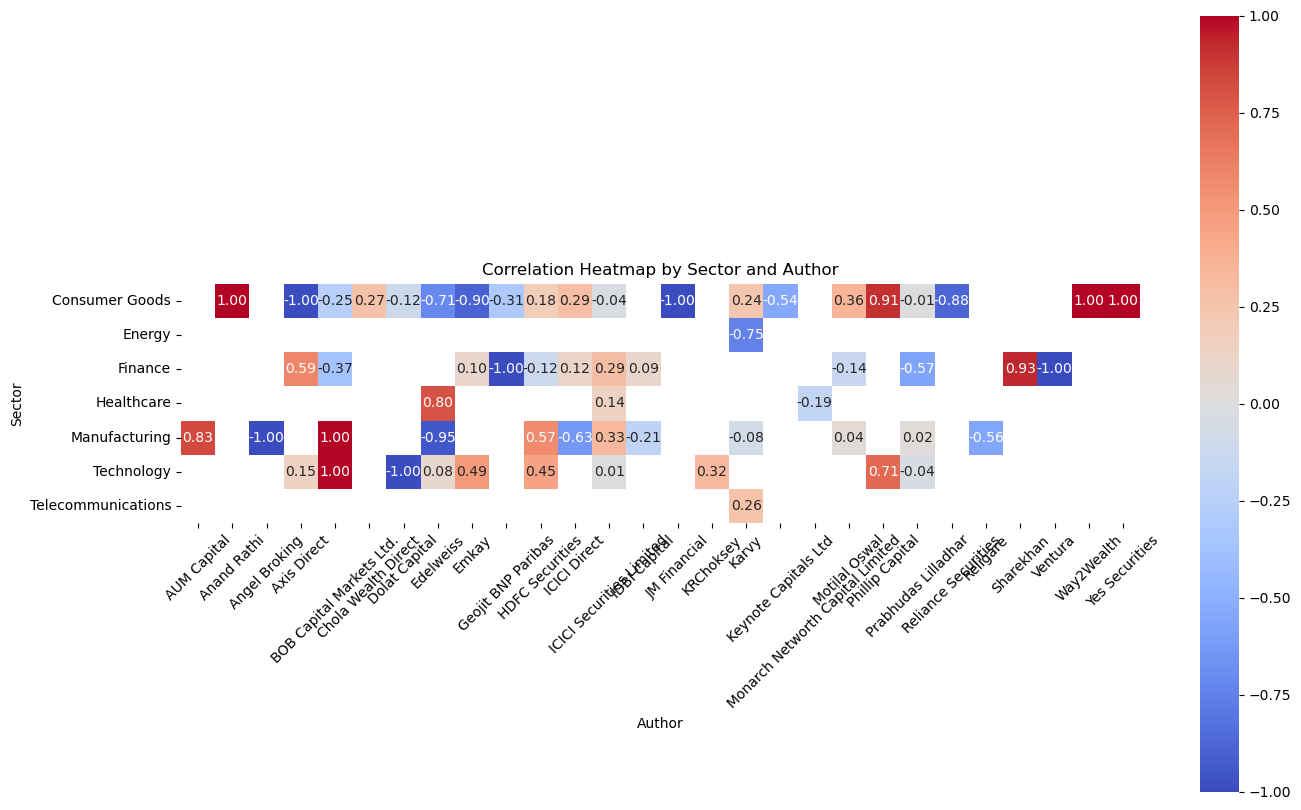

In [28]:

# Pivot the DataFrames for heatmap visualization
heatmap_data_author = sector_author_corr.pivot(index='Sector', columns='author', values='correlation')

# Plot heatmap for (sector, author)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_author, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap by Sector and Author')
plt.xlabel('Author')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:

# (2) Correlation by (sector, year)
sector_year_corr = calculate_correlation(filtered_df, ['Sector', 'year'])
print("\nCorrelation by (sector, year):\n", sector_year_corr)


Correlation by (sector, year):
                 Sector  year  correlation
0       Consumer Goods  2015     0.406506
1       Consumer Goods  2016     0.366037
2       Consumer Goods  2017     0.250595
3       Consumer Goods  2018    -0.199377
4       Consumer Goods  2019     0.019893
5       Consumer Goods  2020     0.060915
6       Consumer Goods  2021    -0.296688
7       Consumer Goods  2022    -0.094439
8       Consumer Goods  2023    -0.286062
9       Consumer Goods  2024    -0.100194
10              Energy  2018    -0.682790
11             Finance  2017     0.040604
12             Finance  2018     0.365534
13             Finance  2019     0.093031
14             Finance  2020    -0.114859
15             Finance  2021    -0.306501
16             Finance  2022    -0.302963
17             Finance  2023     0.808219
18             Finance  2024    -0.318169
19          Healthcare  2016     0.621926
20          Healthcare  2017     0.244423
21          Healthcare  2018    -0.524752
2

C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2222097451.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


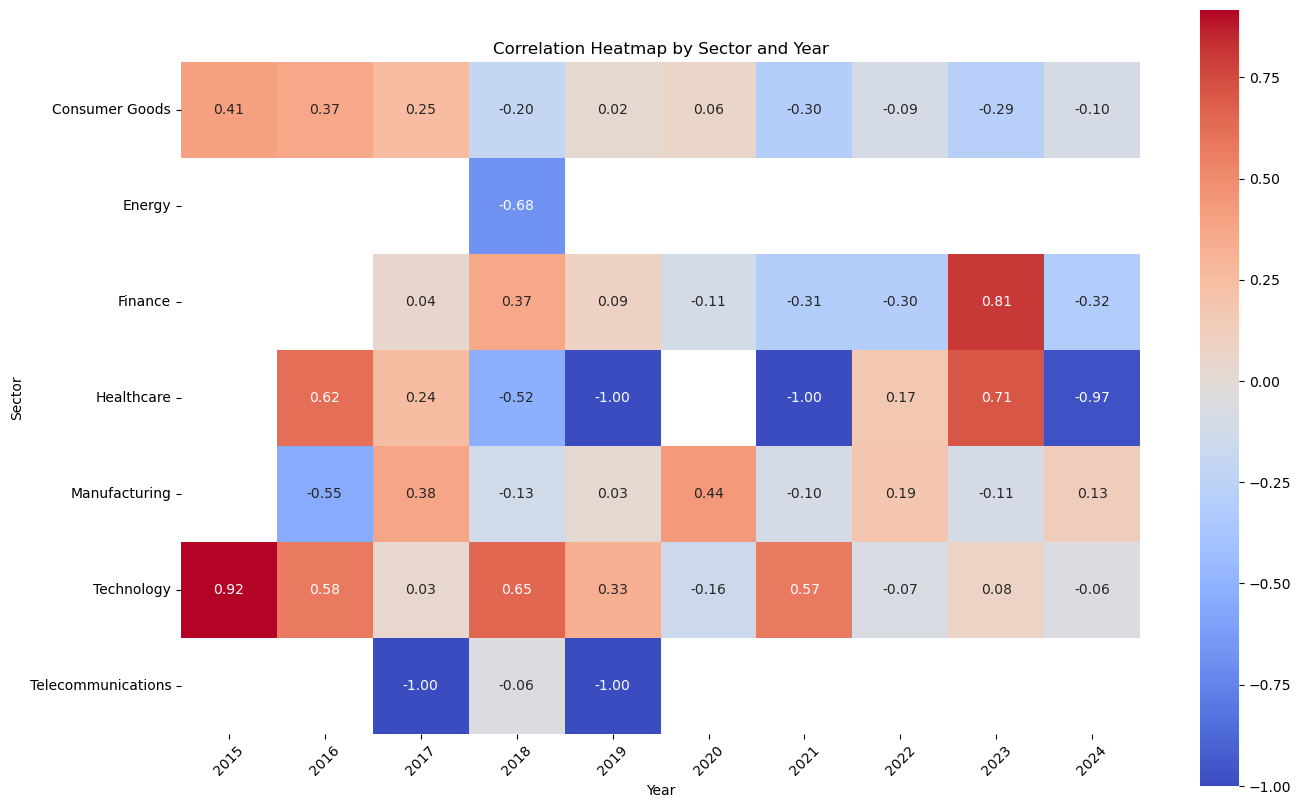

In [30]:
heatmap_data_year = sector_year_corr.pivot(index='Sector', columns='year', values='correlation')
# Plot heatmap for (sector, year)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_year, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
